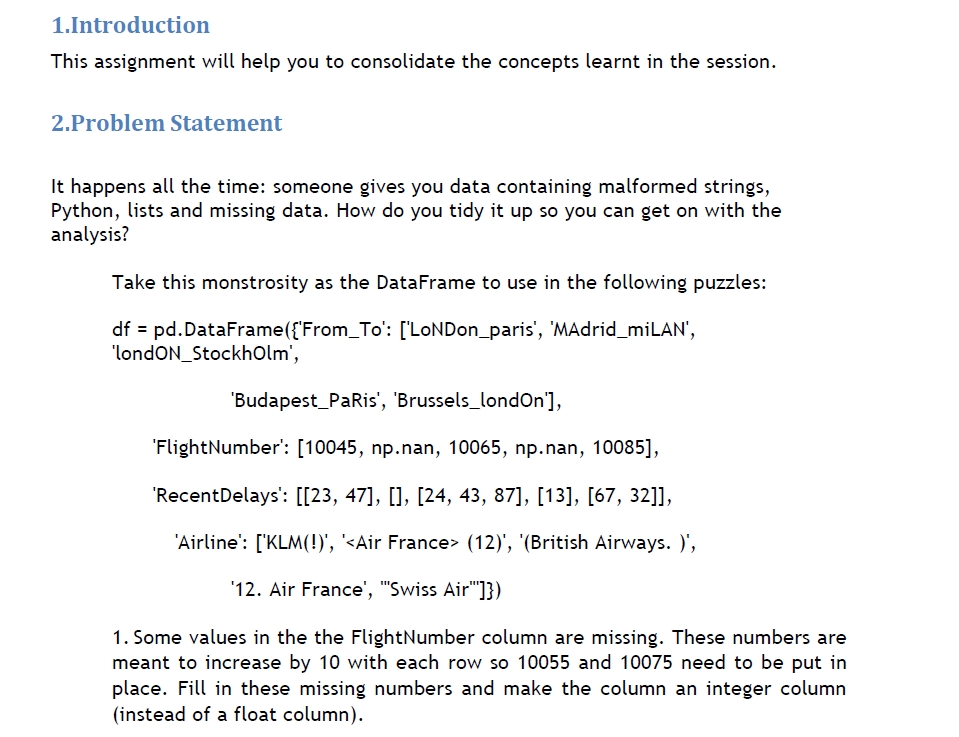

In [149]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN',
'londON_StockhOlm',

'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})
df['FightNumber_lag']=df['FlightNumber'].shift(1)
df['FlightNumber_FillNA']=np.where(df['FlightNumber'].isnull(),(df['FightNumber_lag']+10),df['FlightNumber'])
print("*"*100)
print("Data Type before conversion:\n\n FlightNumber:",df['FlightNumber'].dtypes)
print("*"*100)
print("\n"*2)
df['FlightNumber']=df['FlightNumber_FillNA'].astype(int)
df=df.drop(['FlightNumber_FillNA','FightNumber_lag'],axis=1)
print(df)

print("\n"*2)
print("*"*100)
print("Data Type after conversion:\n\n FlightNumber:",df['FlightNumber'].dtypes)
print("*"*100)


****************************************************************************************************
Data Type before conversion:

 FlightNumber: float64
****************************************************************************************************



            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris         10045      [23, 47]               KLM(!)
1      MAdrid_miLAN         10055            []    <Air France> (12)
2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis         10075          [13]       12. Air France
4   Brussels_londOn         10085      [67, 32]          "Swiss Air"



****************************************************************************************************
Data Type after conversion:

 FlightNumber: int32
****************************************************************************************************


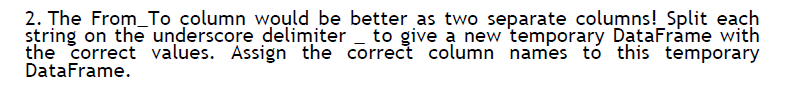

In [150]:
temp=df.From_To.str.split('_',expand=True)
temp.columns=['From','To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


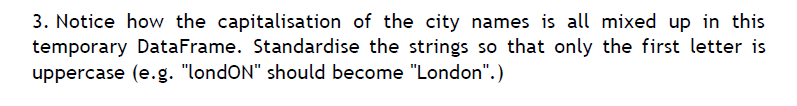

In [151]:
temp['From']=temp['From'].str.title()
temp['To']=temp['To'].str.title()
print(temp)

       From         To
0    London      Paris
1    Madrid      Milan
2    London  Stockholm
3  Budapest      Paris
4  Brussels     London


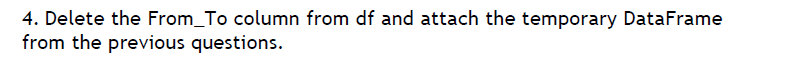

In [152]:
df=df.drop('From_To',axis=1)
df=df.join(temp)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


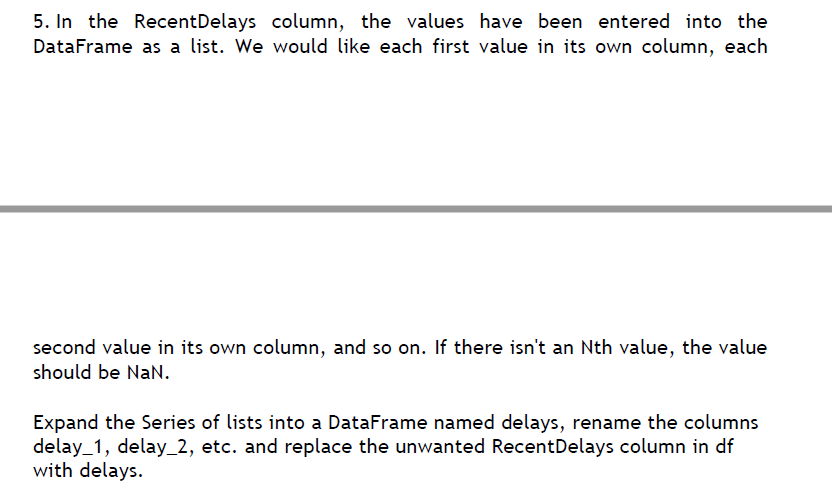

In [153]:


delays = pd.DataFrame(df['RecentDelays'].values.tolist(), columns=['delay_1','delay_2','delay_3'])
df=pd.concat([df,delays],axis=1)
df=df.drop('RecentDelays',axis=1)
print(df)

   FlightNumber              Airline      From         To  delay_1  delay_2  \
0         10045               KLM(!)    London      Paris     23.0     47.0   
1         10055    <Air France> (12)    Madrid      Milan      NaN      NaN   
2         10065  (British Airways. )    London  Stockholm     24.0     43.0   
3         10075       12. Air France  Budapest      Paris     13.0      NaN   
4         10085          "Swiss Air"  Brussels     London     67.0     32.0   

   delay_3  
0      NaN  
1      NaN  
2     87.0  
3      NaN  
4      NaN  
